# Capstone 1 Report

## Preliminaries

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats

### Load dataset

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

## Data Wrangling

### SEX
Change values of sex column to 0 & 1

In [3]:
df.SEX.replace({1:0, 2:1}, inplace=True)

### EDUCATION
Change unlabeled data in education to 'Other'

In [4]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4

### MARRIAGE
Change unlabeled data in marriage to 'Other'

In [5]:
fil = (df.MARRIAGE == 0)
df.loc[fil, 'MARRIAGE'] = 3

### Pay Data <i>(PAY_0 - PAY_6, BILL_AMT1 - BILL_AMT6, PAY_AMT1 - PAY_AMT6)</i>

#### PAY_1 - PAY_6
Change pay status columns to 0 (payment) or 1 (no payment) & rename pay status, bill amount, and pay amount for clarity

In [6]:
#Repayment status, 9/2005
fil = (df.PAY_0 > 0) 
df.loc[fil, 'PAY_0'] = 1

fil = (df.PAY_0 <= 0) 
df.loc[fil, 'PAY_0'] = 0

#Repayment status, 8/2005
fil = (df.PAY_2 > 0)
df.loc[fil, 'PAY_2'] = 1

fil = (df.PAY_2 <= 0)
df.loc[fil, 'PAY_2'] = 0

#Repayment status, 7/2005
fil = (df.PAY_3 > 0)
df.loc[fil, 'PAY_3'] = 1

fil = (df.PAY_3 <= 0)
df.loc[fil, 'PAY_3'] = 0

#Repayment status, 6/2005
fil = (df.PAY_4 > 0)
df.loc[fil, 'PAY_4'] = 1

fil = (df.PAY_4 <= 0)
df.loc[fil, 'PAY_4'] = 0

#Repayment status, 5/2005
fil = (df.PAY_5 > 0)
df.loc[fil, 'PAY_5'] = 1

fil = (df.PAY_5 <= 0)
df.loc[fil, 'PAY_5'] = 0

#Repayment status, 4/2005
fil = (df.PAY_6 > 0)
df.loc[fil, 'PAY_6'] = 1

fil = (df.PAY_6 <= 0)
df.loc[fil, 'PAY_6'] = 0

#Rename columns to match months (4 - 9)
df.rename(index = str, columns = {'PAY_0': 'PAY_9', 'PAY_2': 'PAY_8', 'PAY_3': 'PAY_7',
                                  'PAY_4': 'PAY_6', 'PAY_6': 'PAY_4',
                                 'BILL_AMT1': 'BILL_AMT9', 'BILL_AMT2': 'BILL_AMT8',
                                 'BILL_AMT3': 'BILL_AMT7', 'BILL_AMT4': 'BILL_AMT6',
                                 'BILL_AMT6': 'BILL_AMT4',
                                 'PAY_AMT1': 'PAY_AMT9', 'PAY_AMT2': 'PAY_AMT8',
                                  'PAY_AMT3': 'PAY_AMT7', 'PAY_AMT4': 'PAY_AMT6', 
                                 'PAY_AMT6': 'PAY_AMT4'}, inplace = True)

## Exploratory Data Analysis

### Default data

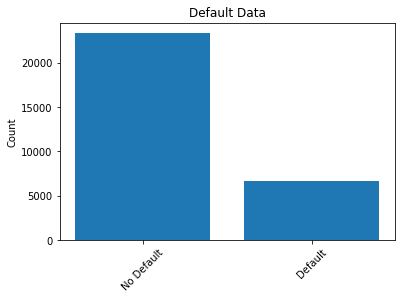

Percentage of total defaults
0.2212


In [7]:
#shorten default column name
df.rename(index = str, columns ={'default.payment.next.month': 'default'}, inplace = True)

#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['default'].unique()))

#Describe default.payment.next.month
plt.bar(x,df['default'].value_counts().sort_index())
plt.ylabel('Count')
plt.xticks(x,('No Default','Default'),rotation=45)
plt.title('Default Data')
plt.show()

#show statistics
print('Percentage of total defaults')
print(df['default'].mean())

### Balance limit data

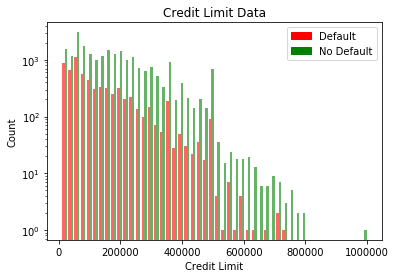

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,23364.0,178099.726074,131628.359660,10000.0,70000.0,150000.0,250000.0,1000000.0
1,6636.0,130109.656420,115378.540571,10000.0,50000.0,90000.0,200000.0,740000.0


In [8]:
#define variables for default & no default
default_limit_bal = df[df['default'] == 1]['LIMIT_BAL']
no_default_limit_bal = df[df['default'] == 0]['LIMIT_BAL']

#create plot
plt.hist([default_limit_bal, no_default_limit_bal], bins = 50, color = ['red', 'green'],
         alpha = 0.6)

#add lables and change scale
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Credit Limit')
plt.title('Credit Limit Data')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

plt.show()

#show summary statistics
df.groupby('default')['LIMIT_BAL'].describe()

### Sex data

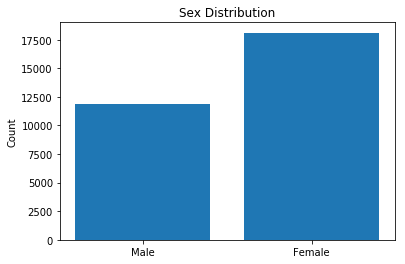

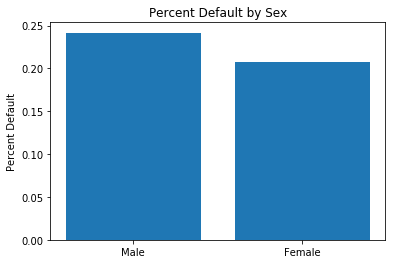

In [9]:
#plot sex distribution
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['SEX'].unique()))

#make bar plot of value counts
plt.bar(x,df['SEX'].value_counts().sort_index())

#label the axes and add title
plt.ylabel('Count')
plt.xticks(x,('Male','Female'))
plt.title('Sex Distribution')

#show plot
plt.show()

#plot percent default by sex
#calulate the percent default for each category
defaults_by_sex=df.groupby('SEX')['default'].mean()

#Create the barplot
plt.bar(x,defaults_by_sex)

#label the axes and add title
plt.ylabel('Percent Default')
plt.xticks(x,('Male','Female'))
plt.title('Percent Default by Sex')

#show plot
plt.show()

### Education data

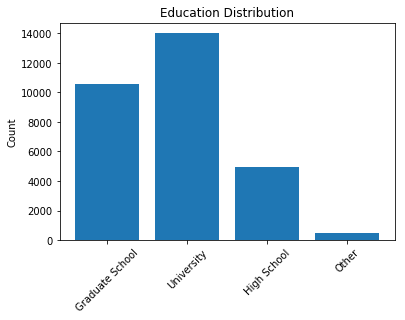

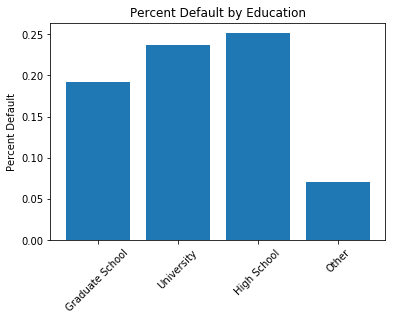

In [10]:
#plot education distribution
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['EDUCATION'].unique()))

#Make bar plot of value counts
plt.bar(x,df['EDUCATION'].value_counts().sort_index())

#label axes and add title
plt.ylabel('Count')
plt.xticks(x,('Graduate School','University','High School','Other'), rotation=45)
plt.title('Education Distribution')

#show plot
plt.show()

#plot percent default by education
#count the number of defaults for each category
defaults_by_education=df.groupby('EDUCATION')['default'].mean()

#Make bar plot
plt.bar(x,defaults_by_education)

#label axes and add title
plt.ylabel('Percent Default')
plt.xticks(x,('Graduate School','University','High School','Other'),rotation=45)
plt.title('Percent Default by Education')

#show plot
plt.show()

### Marriage data

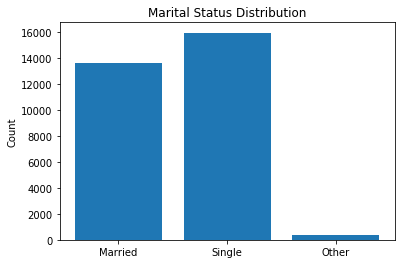

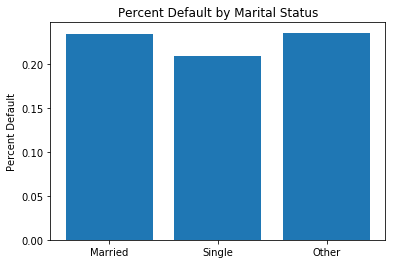

In [11]:
#plot marital status distribution
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['MARRIAGE'].unique()))

#Make barplot of value counts
plt.bar(x,df['MARRIAGE'].value_counts().sort_index())

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Married','Single','Other'))
plt.title('Marital Status Distribution')

#show plot
plt.show()

#plot percent default by marital status
#count the number of defaults for each category
average_defaults_by_marriage=df.groupby('MARRIAGE')['default'].mean()

#make barplot
plt.bar(x,average_defaults_by_marriage)

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Married','Single','Other'))
plt.title('Percent Default by Marital Status')

#show plot
plt.show()

### Age data

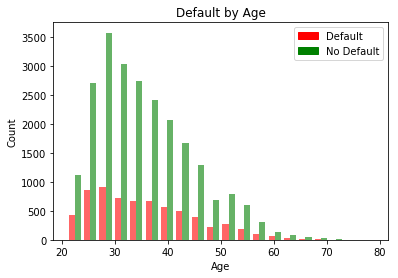

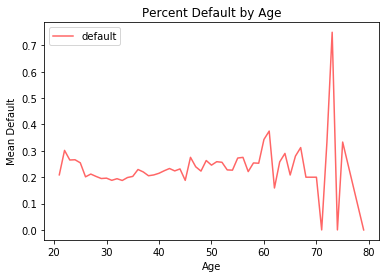

In [12]:
#define variables for default & no default
default_age = df[df['default'] == 1]['AGE']
no_default_age = df[df['default'] == 0]['AGE']

#Make historgram of age
plt.hist([default_age, no_default_age], bins = 20, color = ['red', 'green'],
        alpha = 0.6)

#add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Default by Age')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#mean default by age
default_by_age=pd.DataFrame(df.groupby(['AGE'])['default'].mean())
default_by_age.plot(title='average default by age', color = 'red', alpha = 0.6)
plt.ylabel('Mean Default')
plt.xlabel('Age')
plt.title('Percent Default by Age')
plt.show()

### Pay data (September, 2005)
#### Pay Status

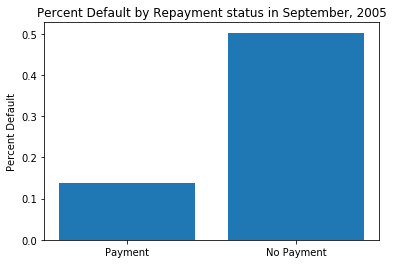

In [13]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_9'].unique()))

#calulate the percent default for each category
defaults_by_pay_status9 = df.groupby('PAY_9')['default'].mean()

#make bar plot
plt.bar(x,defaults_by_pay_status9)

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Payment','No Payment'))
plt.title('Percent Default by Repayment status in September, 2005')

#show plot
plt.show()

#### Bill Amount

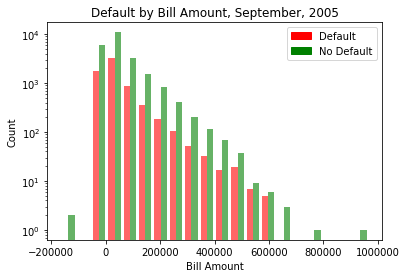

In [14]:
#define variables for default & no default
default_bill_amt9 = df[df['default'] == 1]['BILL_AMT9']
no_default_bill_amt9 = df[df['default'] == 0]['BILL_AMT9']

#make histogram of bill amounts for 9/2005
plt.hist([default_bill_amt9, no_default_bill_amt9],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Default by Bill Amount, September, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#### Pay Amount

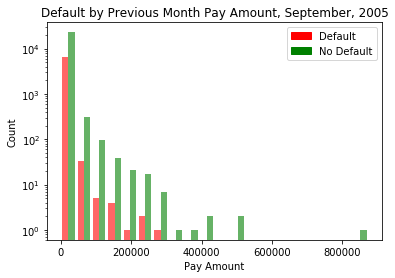

In [15]:
#define variables for default & no default
default_pay_amt9 = df[df['default'] == 1]['PAY_AMT9']
no_default_pay_amt9 = df[df['default'] == 0]['PAY_AMT9']

#make histogram of previous month pay amounts for 9/2005
plt.hist([default_pay_amt9, no_default_pay_amt9],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Pay Amount')
plt.ylabel('Count')
plt.title('Default by Previous Month Pay Amount, September, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

### Pay data (August, 2005)
#### Pay Status

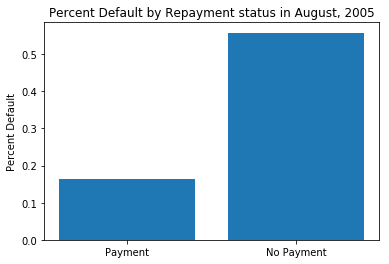

In [16]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_8'].unique()))

#calulate the percent default for each category
defaults_by_pay_status8=df.groupby('PAY_8')['default'].mean()

#make bar plot
plt.bar(x,defaults_by_pay_status8)

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Payment','No Payment'))
plt.title('Percent Default by Repayment status in August, 2005')

#show plot
plt.show()

#### Bill Amount

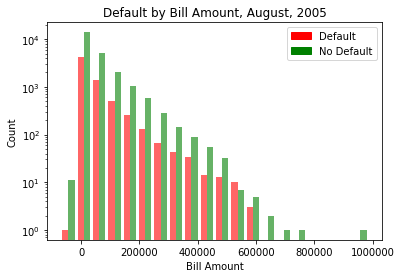

In [17]:
#define variables for default & no default
default_bill_amt8 = df[df['default'] == 1]['BILL_AMT8']
no_default_bill_amt8 = df[df['default'] == 0]['BILL_AMT8']

#make histogram of bill amounts for 8/2005
plt.hist([default_bill_amt8, no_default_bill_amt8],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Default by Bill Amount, August, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#### Pay Amount

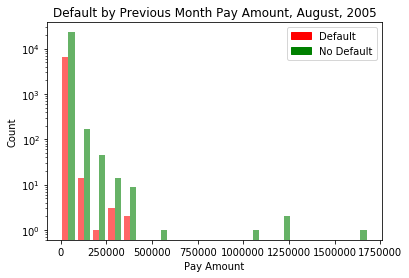

In [18]:
#define variables for default & no default
default_pay_amt8 = df[df['default'] == 1]['PAY_AMT8']
no_default_pay_amt8 = df[df['default'] == 0]['PAY_AMT8']

#make histogram of previous month pay amounts for 8/2005
plt.hist([default_pay_amt8, no_default_pay_amt8],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Pay Amount')
plt.ylabel('Count')
plt.title('Default by Previous Month Pay Amount, August, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

### Pay data (July, 2005)
#### Pay Status

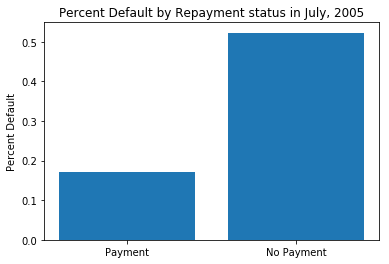

In [19]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_7'].unique()))

#calulate the percent default for each category
defaults_by_pay_status7=df.groupby('PAY_7')['default'].mean()

#make bar plot of default mean of each value count of repayment status for 7/2005
plt.bar(x,defaults_by_pay_status7)

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Payment','No Payment'))
plt.title('Percent Default by Repayment status in July, 2005')

#show plot
plt.show()

#### Bill Amount

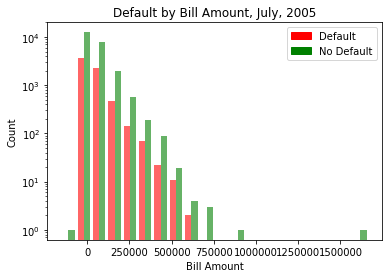

In [20]:
#define variables for default & no default
default_bill_amt7 = df[df['default'] == 1]['BILL_AMT7']
no_default_bill_amt7 = df[df['default'] == 0]['BILL_AMT7']

#make histogram of bill amounts for 7/2005
plt.hist([default_bill_amt7, no_default_bill_amt7],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Default by Bill Amount, July, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#### Pay Amount

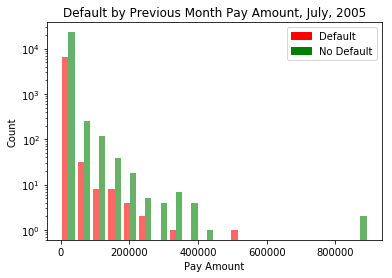

In [21]:
#define variables for default & no default
default_pay_amt7 = df[df['default'] == 1]['PAY_AMT7']
no_default_pay_amt7 = df[df['default'] == 0]['PAY_AMT7']

#make histogram of previous month pay amounts for 7/2005
plt.hist([default_pay_amt7, no_default_pay_amt7],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Pay Amount')
plt.ylabel('Count')
plt.title('Default by Previous Month Pay Amount, July, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

### Pay data (June, 2005)
#### Pay Status

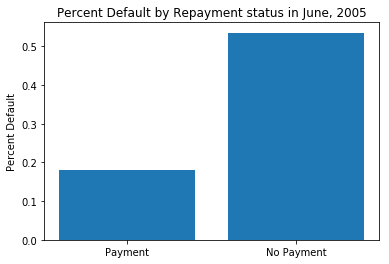

In [22]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_6'].unique()))

#calulate the percent default for each category
defaults_by_pay_status6=df.groupby('PAY_6')['default'].mean()

#make bar plot
plt.bar(x,defaults_by_pay_status6)

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Payment','No Payment'))
plt.title('Percent Default by Repayment status in June, 2005')

#show plot
plt.show()

#### Bill Amount

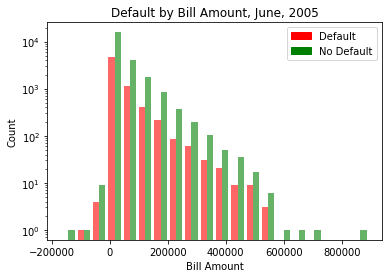

In [23]:
#define variables for default & no default
default_bill_amt6 = df[df['default'] == 1]['BILL_AMT6']
no_default_bill_amt6 = df[df['default'] == 0]['BILL_AMT6']

#make histogram of bill amounts for 6/2005
plt.hist([default_bill_amt6, no_default_bill_amt6],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Default by Bill Amount, June, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#### Pay Amount

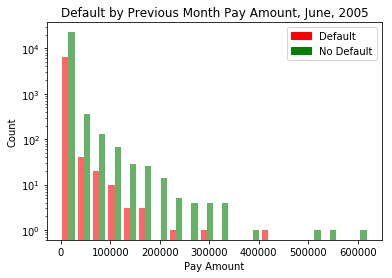

In [24]:
#define variables for default & no default
default_pay_amt6 = df[df['default'] == 1]['PAY_AMT6']
no_default_pay_amt6 = df[df['default'] == 0]['PAY_AMT6']

#make histogram of previous month pay amounts for 6/2005
plt.hist([default_pay_amt6, no_default_pay_amt6],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Pay Amount')
plt.ylabel('Count')
plt.title('Default by Previous Month Pay Amount, June, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

### Pay data (May, 2005)
#### Pay Status

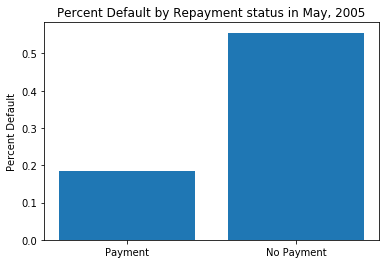

In [25]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_5'].unique()))

#calulate the percent default for each category
defaults_by_pay_status5=df.groupby('PAY_5')['default'].mean()

#make bar plot
plt.bar(x,defaults_by_pay_status5)

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Payment','No Payment'))
plt.title('Percent Default by Repayment status in May, 2005')

#show plot
plt.show()

#### Bill Amount

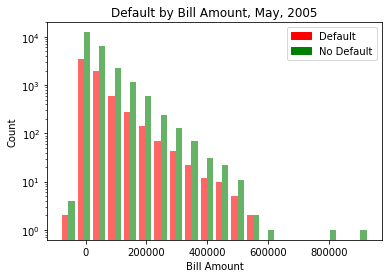

In [26]:
#define variables for default & no default
default_bill_amt5 = df[df['default'] == 1]['BILL_AMT5']
no_default_bill_amt5 = df[df['default'] == 0]['BILL_AMT5']

#make histogram of bill amounts for 5/2005
plt.hist([default_bill_amt5, no_default_bill_amt5],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Default by Bill Amount, May, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#### Pay Amount

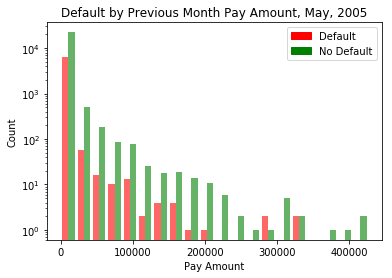

In [27]:
#define variables for default & no default
default_pay_amt5 = df[df['default'] == 1]['PAY_AMT5']
no_default_pay_amt5 = df[df['default'] == 0]['PAY_AMT5']

#make histogram of previous month pay amounts for 5/2005
plt.hist([default_pay_amt5, no_default_pay_amt5],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Pay Amount')
plt.ylabel('Count')
plt.title('Default by Previous Month Pay Amount, May, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

### Pay data (April, 2005)
#### Pay Status

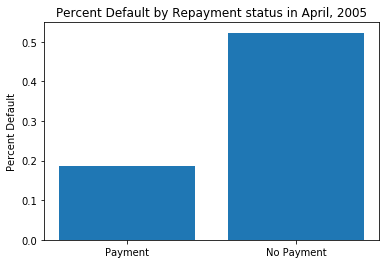

In [28]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_4'].unique()))

#calulate the percent default for each category
defaults_by_pay_status4=df.groupby('PAY_4')['default'].mean()

#make bar plot
plt.bar(x,defaults_by_pay_status4)

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Payment','No Payment'))
plt.title('Percent Default by Repayment status in April, 2005')

#show plot
plt.show()

#### Bill Amount

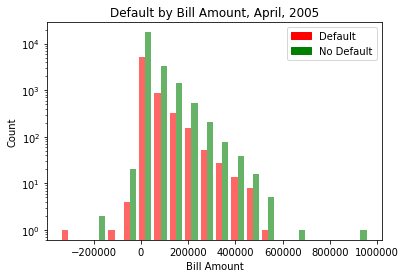

In [29]:
#define variables for default & no default
default_bill_amt4 = df[df['default'] == 1]['BILL_AMT4']
no_default_bill_amt4 = df[df['default'] == 0]['BILL_AMT4']

#make histogram of bill amounts for 4/2005
plt.hist([default_bill_amt4, no_default_bill_amt4],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Default by Bill Amount, April, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#### Pay Amount

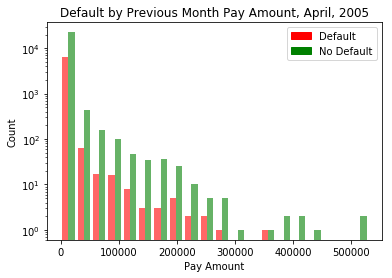

In [30]:
#define variables for default & no default
default_pay_amt4 = df[df['default'] == 1]['PAY_AMT4']
no_default_pay_amt4 = df[df['default'] == 0]['PAY_AMT4']

#make histogram of previous month pay amounts for 4/2005
plt.hist([default_pay_amt4, no_default_pay_amt4],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Pay Amount')
plt.ylabel('Count')
plt.title('Default by Previous Month Pay Amount, April, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

## Data Modeling

In [31]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### Define PIF (paid in full) columns

In [32]:
#define columns names
#Note: can't define for September/1 because there is no pay data for October
PIF_cols = ['PIF_8', 'PIF_7', 'PIF_6', 'PIF_5', 'PIF_4']
PAY_cols = ['PAY_AMT9', 'PAY_AMT8', 'PAY_AMT7', 'PAY_AMT6', 'PAY_AMT5']
BILL_cols = ['BILL_AMT8', 'BILL_AMT7', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4']

for pif, i in zip(PIF_cols, np.arange(0,5)):
    df[pif] = (df[PAY_cols[i]] >= df[BILL_cols[i]])

#### EDA for PIF columns

August

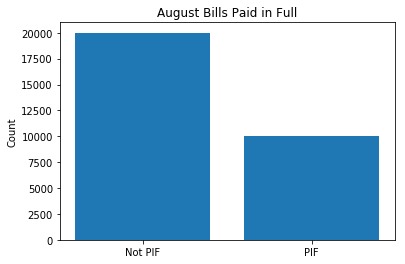

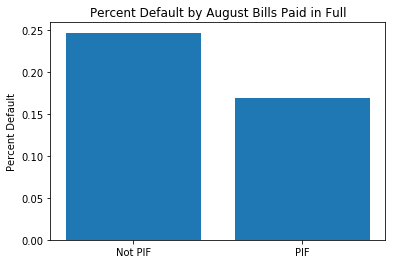

In [33]:
#plot august paid in full distribution
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PIF_8'].unique()))

#Make barplot
plt.bar(x,df['PIF_8'].value_counts().sort_index())

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Not PIF','PIF'))
plt.title('August Bills Paid in Full')

#show plot
plt.show()

#plot percent default by august paid in full
#count the number of defaults for each category
average_defaults_by_pif_8=df.groupby('PIF_8')['default'].mean()

#make barplot
plt.bar(x,average_defaults_by_pif_8)

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Not PIF','PIF'))
plt.title('Percent Default by August Bills Paid in Full')

#show plot
plt.show()

July

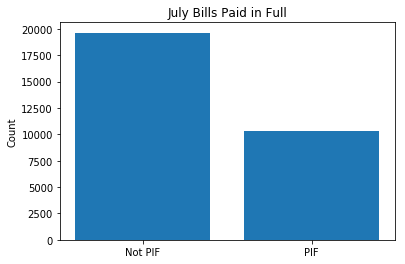

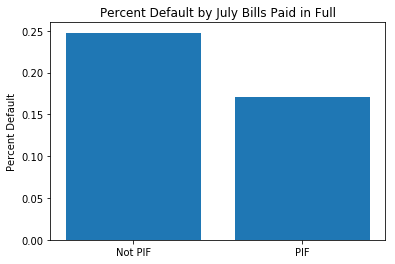

In [34]:
#plot july paid in full distribution
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PIF_7'].unique()))

#Make barplot
plt.bar(x,df['PIF_7'].value_counts().sort_index())

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Not PIF','PIF'))
plt.title('July Bills Paid in Full')

#show plot
plt.show()

#plot percent default by july paid in full
#count the number of defaults for each category
average_defaults_by_pif_7=df.groupby('PIF_7')['default'].mean()

#make barplot
plt.bar(x,average_defaults_by_pif_7)

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Not PIF','PIF'))
plt.title('Percent Default by July Bills Paid in Full')

#show plot
plt.show()

June

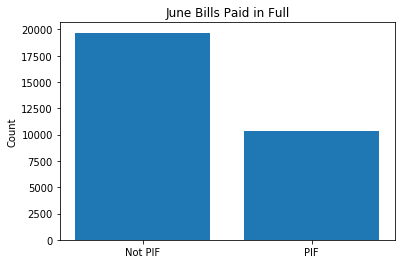

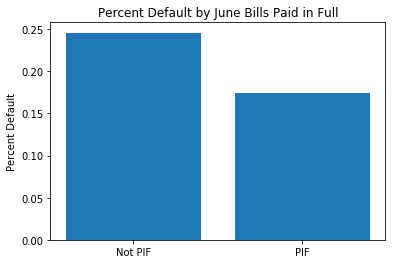

In [35]:
#plot june paid in full distribution
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PIF_6'].unique()))

#Make barplot
plt.bar(x,df['PIF_6'].value_counts().sort_index())

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Not PIF','PIF'))
plt.title('June Bills Paid in Full')

#show plot
plt.show()

#plot percent default by june paid in full
#count the number of defaults for each category
average_defaults_by_pif_6=df.groupby('PIF_6')['default'].mean()

#make barplot of default
plt.bar(x,average_defaults_by_pif_6)

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Not PIF','PIF'))
plt.title('Percent Default by June Bills Paid in Full')

#show plot
plt.show()

May

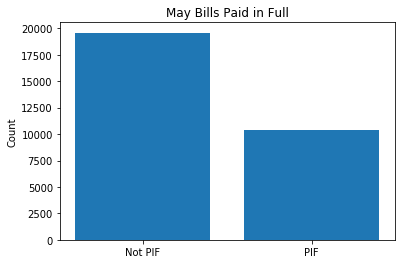

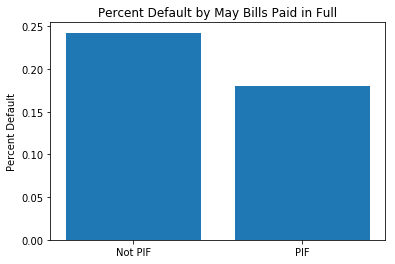

In [36]:
#plot may paid in full distribution
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PIF_5'].unique()))

#Make barplot
plt.bar(x,df['PIF_5'].value_counts().sort_index())

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Not PIF','PIF'))
plt.title('May Bills Paid in Full')

#show plot
plt.show()

#plot percent default by may paid in full
#count the number of defaults for each category
average_defaults_by_pif_5=df.groupby('PIF_5')['default'].mean()

#make barplot of default
plt.bar(x,average_defaults_by_pif_5)

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Not PIF','PIF'))
plt.title('Percent Default by May Bills Paid in Full')

#show plot
plt.show()

April

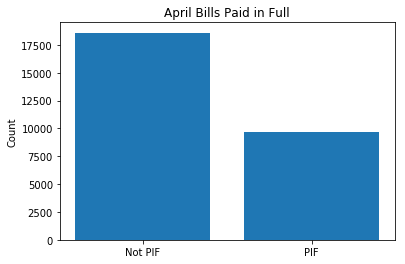

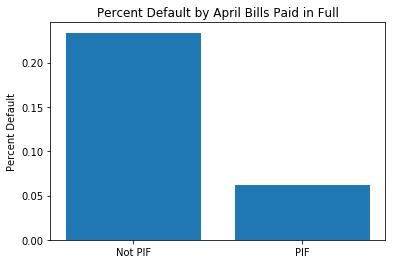

In [60]:
#plot april paid in full distribution
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PIF_4'].unique()))

#Make barplot
plt.bar(x,df['PIF_4'].value_counts().sort_index())

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Not PIF','PIF'))
plt.title('April Bills Paid in Full')

#show plot
plt.show()

#plot percent default by april paid in full
#count the number of defaults for each category
average_defaults_by_pif_4=df.groupby('PIF_4')['default'].mean()

#make barplot
plt.bar(x,average_defaults_by_pif_4)

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Not PIF','PIF'))
plt.title('Percent Default by April Bills Paid in Full')

#show plot
plt.show()

Drop clients who closed their accounts

In [38]:
#filter customers who closed their account to drop from the dataset
closed = df[(df['default'] == 1) & (df['PIF_8'] == 1)]

df = df.drop(closed.index)

### Split categorical columns

In [39]:
#create dummy variable columns for categorical variables
df[['MARRIED','SINGLE','OTHER']] =  pd.get_dummies(df['MARRIAGE'])
df[['GRADUATE_SCHOOL','UNIVERSITY','HIGH_SCHOOL','OTHERS']] =  pd.get_dummies(df['EDUCATION'])

#drop others columns
df = df.drop(['OTHER', 'OTHERS'], axis = 1)

### Train Test Split

Import packages

In [40]:
#set dependent variable to default.payment.next.month
y = df['default'].copy()

#set independent varaible to remaining columns (features)
features = ['LIMIT_BAL', 'SEX', 'GRADUATE_SCHOOL','UNIVERSITY','HIGH_SCHOOL',
            'MARRIED','SINGLE', 'AGE', 'PAY_9', 'PAY_8', 'PAY_7', 'PAY_6',
            'PAY_5', 'PAY_4', 'PIF_8', 'PIF_7', 'PIF_6', 'PIF_5', 'PIF_4']

X = df[features].copy()

#split the dataset into testing and training using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Tuning

In [41]:
parameters = {'max_depth': np.linspace(3, 10, 8, dtype = int),
          'n_estimators': np.linspace(30, 200, 18, dtype = int)}

scorer = make_scorer(recall_score)

grid = GridSearchCV(RandomForestClassifier(class_weight = 'balanced', random_state = 42),
                    parameters, scorer, cv=5, return_train_score = True)

grid = grid.fit(X_train, y_train)

In [42]:
print('Best score:', grid.best_score_)
print('Best parameters:', grid.best_params_)

Best score: 0.6992917143893758
Best parameters: {'max_depth': 6, 'n_estimators': 30}


In [43]:
results = pd.DataFrame(grid.cv_results_)

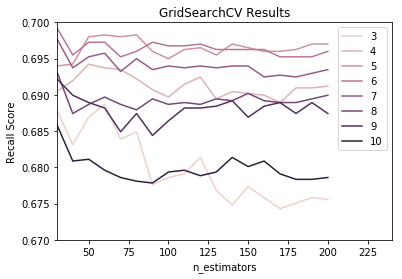

In [44]:
#create figure
plt.figure()

#set title
plt.title('GridSearchCV Results')

#create plot object
ax = plt.gca()

#set x & y limits based on data in results dataframe
ax.set_xlim(30, 240)
ax.set_ylim(0.67, 0.7)

#create plot with results data
sns.lineplot('param_n_estimators', 'mean_test_score', data = results,
            hue = results.param_max_depth.tolist(), legend = 'full',
            ci = 'std_test_score', err_style = 'band')

#label axes
plt.xlabel('n_estimators')
plt.ylabel('Recall Score')

#show plot
plt.show()

In [45]:
#create the classifier
clf = RandomForestClassifier(n_estimators = 30, max_depth = 6, random_state = 42,
                            class_weight = 'balanced')

#fit classifier to training set (with all defaults)
clf = clf.fit(X_train, y_train)

#run prediction on test set
prd = clf.predict(X_test)

#check recall
print('Recall score:', recall_score(y_true = y_test, y_pred = prd))

#show confusion matrix
pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = prd))

Recall score: 0.7020408163265306


,0,1
0,4033,649
1,292,688


In [46]:
imp = clf.feature_importances_.tolist()
imp_df = pd.DataFrame({'feature': features, 'score': imp})
imp_df.sort_values(by='score', ascending = False)

,feature,score
14,PIF_8,0.274671
8,PAY_9,0.183614
9,PAY_8,0.175227
10,PAY_7,0.065750
11,PAY_6,0.062222
15,PIF_7,0.049585
12,PAY_5,0.041277
16,PIF_6,0.036158
0,LIMIT_BAL,0.034948
13,PAY_4,0.029228


In [47]:
parameters = {'max_depth': np.linspace(3, 10, 8, dtype = int),
          'n_estimators': np.linspace(15, 35, 21, dtype = int)}

scorer = make_scorer(recall_score)

grid = GridSearchCV(RandomForestClassifier(class_weight = 'balanced', random_state = 42),
                    parameters, scorer, cv=5, return_train_score = True)

grid = grid.fit(X_train, y_train)

In [48]:
print('Best score:', grid.best_score_)
print('Best parameters:', grid.best_params_)

Best score: 0.7146832910272478
Best parameters: {'max_depth': 7, 'n_estimators': 16}


In [54]:
results2 = pd.DataFrame(grid.cv_results_)

results = pd.concat([results, results2], axis = 0)

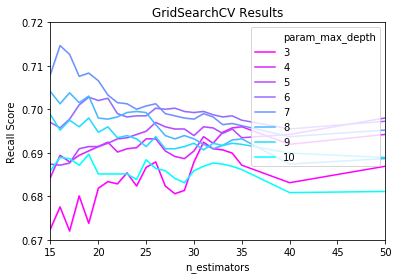

In [85]:
#create figure
plt.figure()

#set title
plt.title('GridSearchCV Results')

#create plot object
ax = plt.gca()

#set x & y limits based on data in results dataframe from both runs
ax.set_xlim(15, 50)
ax.set_ylim(0.67, 0.72)

#create plot with results data
sns.lineplot('param_n_estimators', 'mean_test_score', data = results,
            hue = results.param_max_depth, legend = 'full', palette = 'cool_r')

#label axes
plt.xlabel('n_estimators')
plt.ylabel('Recall Score')

#show plot
plt.show()

#sns.heatmap([results.param_n_estimators, results.param_max_depth], cmap = results.mean_test_score)
#plt.show()

In [61]:
#create the classifier
clf = RandomForestClassifier(n_estimators = 16, max_depth = 7, random_state = 42,
                            class_weight = 'balanced')

#fit classifier to training set (with all defaults)
clf = clf.fit(X_train, y_train)

#run prediction on test set
prd = clf.predict(X_test)

#check recall
print('Recall score:', recall_score(y_true = y_test, y_pred = prd))

#show confusion matrix
pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = prd))

Recall score: 0.7193877551020408


,0,1
0,3973,709
1,275,705


In [62]:
imp = clf.feature_importances_.tolist()
imp_df = pd.DataFrame({'feature': features, 'score': imp})
imp_df.sort_values(by='score', ascending = False)

,feature,score
14,PIF_8,0.273711
8,PAY_9,0.225856
9,PAY_8,0.108314
10,PAY_7,0.076283
11,PAY_6,0.067449
0,LIMIT_BAL,0.055806
12,PAY_5,0.045125
15,PIF_7,0.044115
17,PIF_5,0.028379
13,PAY_4,0.025130
